In [ ]:
!pip install wordcloud==1.8.1

     |████████████████████████████████| 366 kB 13.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
mpl.style.use(['seaborn'])
sns.set_theme(style="whitegrid")

In [ ]:
# Leemos todos los datasets
df_2010 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2010.csv')
df_2011 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2011.csv')
df_2012 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2012.csv')
df_2013 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2013.csv')
df_2014 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2014.csv')
df_2015 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2015.csv')
df_2016 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2016.csv')
df_2017 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2017.csv')
df_2018 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2018.csv')
df_2019 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2019.csv')
df_2020 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2020.csv')
df_2021 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO-DATA-LIMPIA/2021.csv')

## Módulos para los gráficos

### Porcentaje de acuerdo al Grado Académido en cada año

In [ ]:
def pie_plot_grado_acade(df_grado_total, year_name, path_save_img):
    plt.figure(figsize=(15,10))

    colors_list = ['lightcoral', 'lightskyblue', 'lightgreen', 'pink']
    explode_list = [0, 0, 0, 0.1]

    df_grado_total['TOTAL'].plot(kind='pie',
                        figsize=(15, 6),
                        autopct='%1.1f%%',
                        startangle=90,
                        shadow=True,
                        labels=None,
                        pctdistance=1.12,
                        # colors=colors_list,
                        # explode=explode_list
                        )

    plt.title('Porcentaje de Grado Académido - ' + str(year_name), y=1.12) 
    plt.axis('equal')
    plt.legend(labels=df_grado_total.index, loc='upper left')
    plt.savefig(path_save_img + str(year_name) + '/grado_academico_pie.png')
    plt.show()

### Cantidad de personas de acuerdo al sexo

In [ ]:
def bar_cant_personas_sexo(df, year_name, path_save_img):
    df.groupby(by = 'SEXO').sum()['TOTAL'].plot(kind = 'bar')
    plt.title('Cantidad de personas de acuerdo al sexo con estudios mínimos de Pregrado -' + str(year_name))
    plt.ylabel('Cantidad')
    plt.savefig(path_save_img + str(year_name) + '/cant_personas_sexo_bar.png')
    plt.show()

### Promedio de edad de hombres y mujeres - Grado Académico

In [ ]:
def bar_hue_edad_sexo_grado_est(df, year_name, path_save_img):
    plt.figure(figsize=(17,10))
    sns.barplot(x = 'NOM_GRADO_ESTUDIOS', y = 'EDAD', hue = 'SEXO', data = df)
    plt.title('Promedio de edad de hombres y mujeres de acuerdo al Grado de Estudios - ' + str(year_name))
    plt.xlabel('Grado de Estudios')
    plt.savefig(path_save_img + str(year_name) + '/edad_sexo_grad_est_bar.png')
    plt.show()

### WordCloud columnas con String

In [ ]:
def wordcloud_string(df, year_name, campo_string, title, path_save_img):
    text = ''
    # sacamos que departamentos están más personas con más de pregrado
    texts = ','.join(df[campo_string].replace([np.nan, ' '], ''))

    plt.figure(figsize=(15,12), facecolor=None)

    stopwords = STOPWORDS

    regiones_wc = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=25,
        max_font_size=42,
        random_state=42
    )
    regiones_wc.generate(texts)

    plt.imshow(regiones_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(path_save_img + str(year_name) + '/wc_'+ str(campo_string) + '.png')
    plt.show()

### Cantidad de Hombres y Mujeres Psicología PREGRADO

In [ ]:
def cant_psicología_pregrado_sexo(data_psicologia, year_name, path_save_img):
    plt.figure(figsize=(8,7))
    data_psicologia.groupby(by = 'SEXO').sum()['TOTAL'].plot(kind = 'bar', color = 'purple')
    plt.title('Cantidad de Varones y Mujeres PREGRADO Psicología - ' + str(year_name))
    plt.xlabel('Sexo')
    plt.ylabel('Cantidad')
    plt.savefig(path_save_img + str(year_name) + '/psicologia_varones_mujeres.png')
    plt.show()

### 5 carreras más estudiadas en PREGRADO

In [ ]:
def bar_top_5_carr_pregrado(df_pregrado_top_5_carreras, year_name, path_save_img):
    plt.figure(figsize=(10,7))
    sns.barplot(y = 'NOM_CARRERA_UNI', x = 'TOTAL', data = df_pregrado_top_5_carreras.head())
    plt.title('5 Carreras Profesionales más estudiadas en PREGRADO - ' + str(year_name))
    plt.ylabel('Carreras Profesionales')
    plt.savefig(path_save_img + str(year_name) + '/top_5_carr_prof.png')
    plt.show()

## Módulo principal

In [ ]:
def generar_impot_graficas(df, year_name, wc_campo_string, wc_title):
    if (str(year_name) == '2014'):
        df['SEXO'] = df['SEXO'].apply(lambda x: 'Hombre' if x == 1 else 'Mujer')
    df['TOTAL'] = 1
    df_grado_total = df.groupby(by = ['NOM_GRADO_ESTUDIOS']).sum()['TOTAL'].to_frame()

    path_save_img = '/work/enaho-personas-estudios-caracteristicas-data-science/GRAFICOS_POR_ANIO_RESULTADOS/'

    # primer gráfico
    pie_plot_grado_acade(df_grado_total, year_name, path_save_img)
    # segundo gráfico
    bar_cant_personas_sexo(df, year_name, path_save_img)
    # tercer gráfico
    bar_hue_edad_sexo_grado_est(df, year_name, path_save_img)
    # cuarto gráfico
    wordcloud_string(df, year_name, wc_campo_string, wc_title, path_save_img)

    # sacamos a los psicólogos de PREGRADO
    data_psicologia = df[(df['NOM_CARRERA_UNI'].str.upper().isin(["PSICOLOGÍA", "PSICOLOGIA"]))
        & (df['NOM_GRADO_ESTUDIOS'].str.upper().isin(['SUP. UNIV. INCOMPLETA', 'SUPERIOR UNIVERSITARIA INCOMPLETA']))]
    print(f'Número de personas PREGRADO que estudían PSICOLOGÍA: {data_psicologia.shape[0]}')

    # quinto gráfico
    cant_psicología_pregrado_sexo(data_psicologia, year_name, path_save_img)

    # sacamos top 5 carreras de PREGRADO
    df_pregrado = df[df['NOM_GRADO_ESTUDIOS'].str.upper().isin(['SUP. UNIV. INCOMPLETA', 'SUPERIOR UNIVERSITARIA INCOMPLETA'])]
    df_pregrado_top_5_carreras = df_pregrado.groupby(by = 'NOM_CARRERA_UNI', as_index = False).sum().sort_values(by = 'TOTAL', ascending = False)
    df_pregrado_top_5_carreras.reset_index(drop = True, inplace = True)

    # sexto gráfico
    bar_top_5_carr_pregrado(df_pregrado_top_5_carreras, year_name, path_save_img)

# RESULTADOS DE ACUERDO AL AÑO

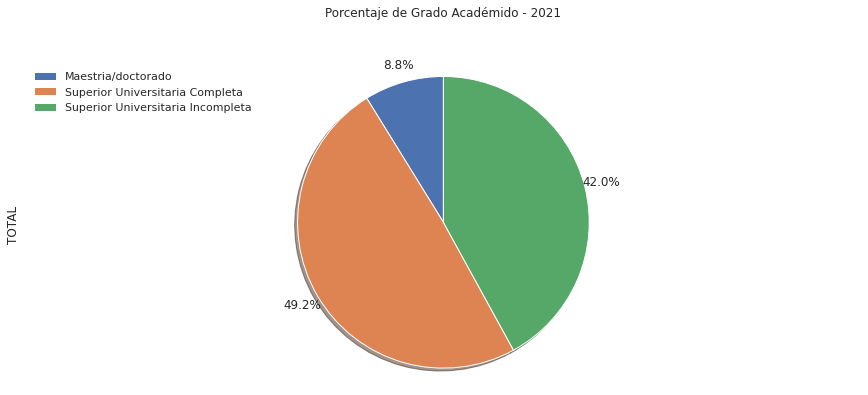

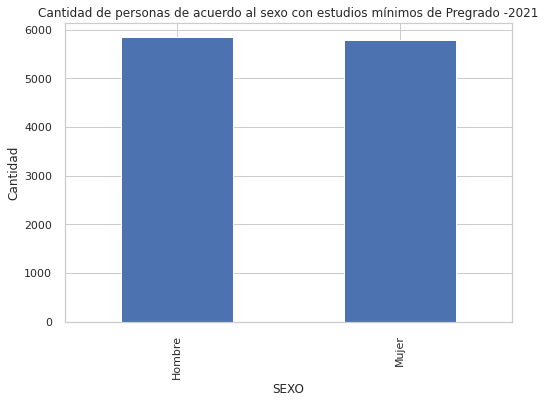

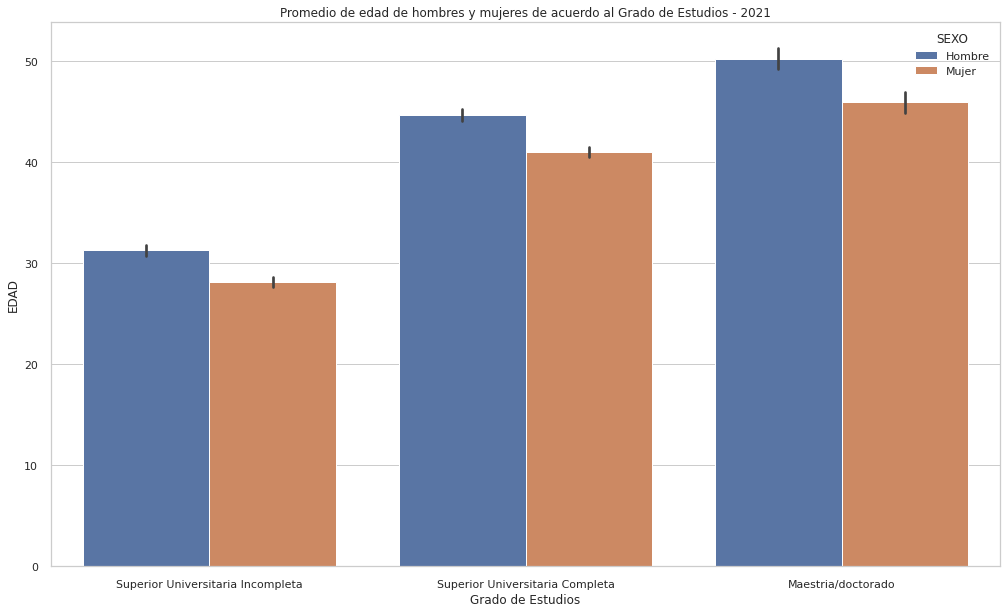

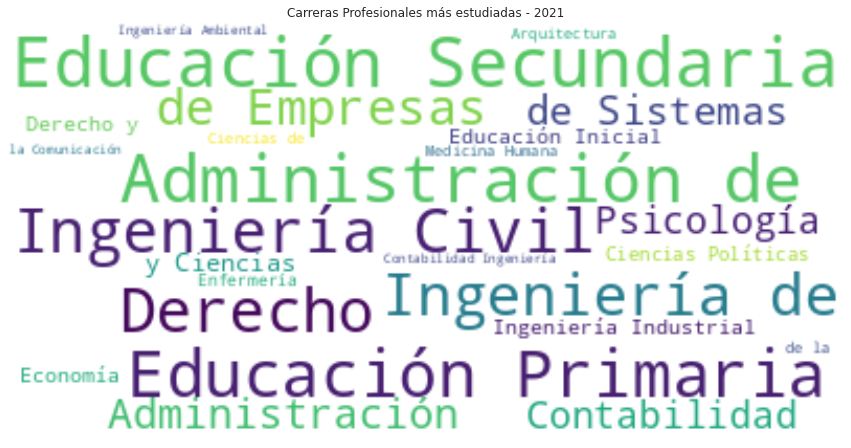

Número de personas PREGRADO que estudían PSICOLOGÍA: 221


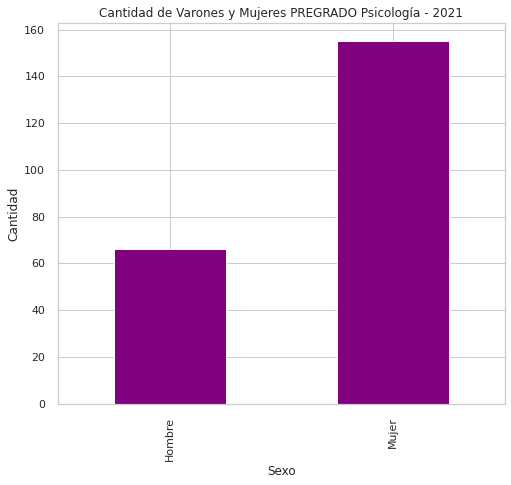

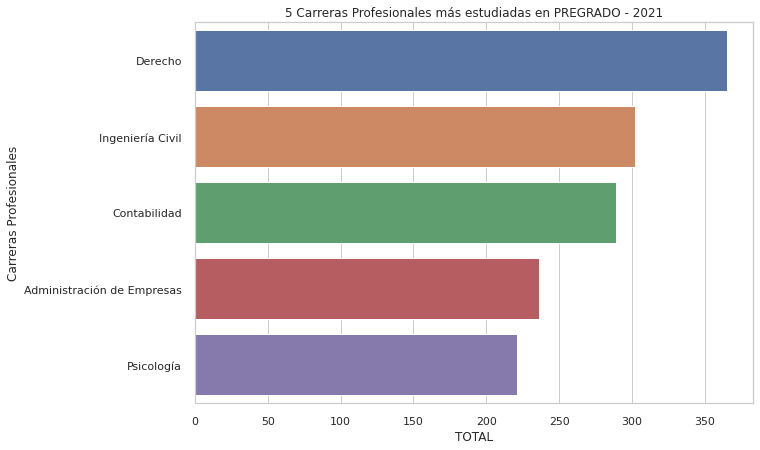

In [ ]:
generar_impot_graficas(df_2021, '2021', 'NOM_CARRERA_UNI', 'Carreras Profesionales más estudiadas - 2021')
# generar_impot_graficas(df_2020, '2020', 'NOM_DOMINIO_G', 'Muestras con más Dominio Geográfico - 2020')
# generar_impot_graficas(df_2019, '2019', 'NOM_CENTRO_ESTUDIOS', 'Centros de Estudios más solicitados - 2019')
# generar_impot_graficas(df_2018, '2018', 'NOM_DEPARTAMENTO', 'Departamentos con más personas mínimo grado Pregrado - 2018')
# generar_impot_graficas(df_2017, '2017', 'NOM_ESTADO_CIVIL', 'Estado Civíl Frecuente entre personas con mínimo grado Pregrado - 2017')
# generar_impot_graficas(df_2016, '2016', 'NOM_IDIOMA', 'Idioma Frecuente de personas con grado mínimo Pregrado - 2016')
# generar_impot_graficas(df_2015, '2015', 'NOM_CENTRO_ESTUDIOS', 'Centros de Estudios más solicitados - 2015')
# generar_impot_graficas(df_2014, '2014', 'NOM_CARRERA_UNI', 'Carreras más estudiadas en - 2014')
# generar_impot_graficas(df_2013, '2013', 'NOM_ESTADO_CIVIL', 'Estado Civíl Frecuente entre personas con mínimo grado Pregrado - 2013')
# generar_impot_graficas(df_2012, '2012', 'NOM_CARRERA_UNI', 'Carreras más estudiadas en - 2012')
# generar_impot_graficas(df_2011, '2011', 'NOM_DOMINIO_G', 'Muestras con más Dominio Geográfico - 2011')
# generar_impot_graficas(df_2010, '2010', 'NOM_ESTADO_CIVIL', 'Estado Civíl Frecuente entre personas con mínimo grado Pregrado - 2010')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61180446-cfea-4338-ac0e-81e50a732b69' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>